Ahmet İmran Coşkun 19548

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns
from datetime import datetime
import reverse_geocoder as rg
from geopy.distance import geodesic
import io
import pprint
import warnings
from geopy.distance import lonlat, distance
import dateutil
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [2]:
from os.path import join
from pprint import pprint

In [3]:
d_path = "C:\\Users\Ahmet Coskun\Desktop\CS 210"
filename = "taxi-trips.csv"

df = pd.read_csv(join(d_path, filename))

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,3/14/2016 17:24,3/14/2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,3/10/2016 21:45,3/10/2016 22:05,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,3/11/2016 7:11,3/11/2016 7:20,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,3/14/2016 14:05,3/14/2016 14:28,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,3/14/2016 15:04,3/14/2016 15:16,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [5]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
df.isnull().sum() #no null data

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [8]:
df["passenger_count"].describe()

count    118185.000000
mean          1.657148
std           1.313844
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [9]:
df["trip_duration"].describe()

count    118185.000000
mean        927.186310
std        3118.710246
min           1.000000
25%         393.000000
50%         652.000000
75%        1048.000000
max       86366.000000
Name: trip_duration, dtype: float64

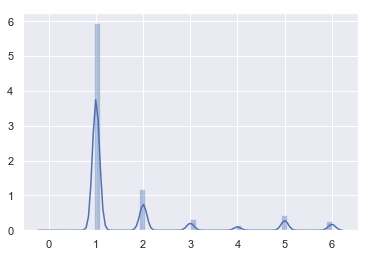

In [10]:
sns.distplot(df["passenger_count"].values, norm_hist=True)  
plt.show()

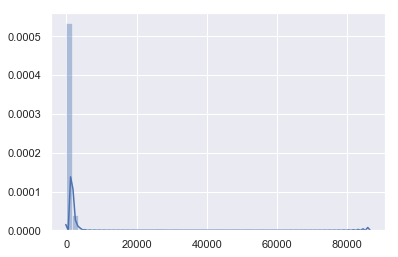

In [11]:
sns.distplot(df["trip_duration"].values, norm_hist=True)  
plt.show()

In [12]:
tuples = tuple(zip(df["pickup_latitude"],df["pickup_longitude"]))
results = rg.search(tuples)

Loading formatted geocoded file...


In [13]:
df2 = pd.DataFrame(results)

In [14]:
df["pickup_district"] = df2["name"]

In [15]:
tuples2 = tuple(zip(df["dropoff_latitude"],df["dropoff_longitude"]))
results2 = rg.search(tuples2)
df3 = pd.DataFrame(results2)

In [16]:
df["dropoff_district"] = df3["name"]

In [17]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,3/14/2016 17:24,3/14/2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,3/10/2016 21:45,3/10/2016 22:05,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,3/11/2016 7:11,3/11/2016 7:20,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,3/14/2016 14:05,3/14/2016 14:28,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,3/14/2016 15:04,3/14/2016 15:16,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


pickup_district
Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: id, dtype: int64


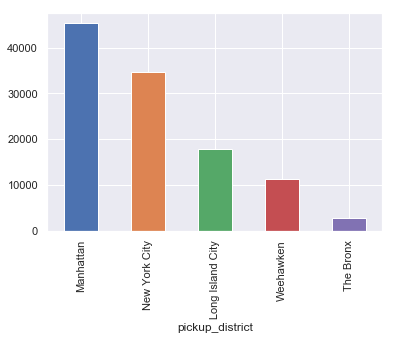

In [18]:
top5pickupdistricts = df.groupby(by="pickup_district").count()["id"].sort_values(ascending=False)[:5]
print(top5pickupdistricts)
top5pickupdistricts.plot(kind="bar")

dropoff_district
Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: id, dtype: int64


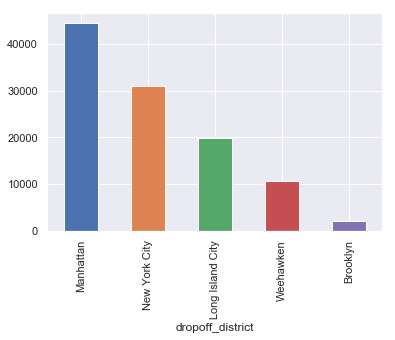

In [19]:
top5dropoffdistricts = df.groupby(by="dropoff_district").count()["id"].sort_values(ascending=False)[:5]
print(top5dropoffdistricts)
top5dropoffdistricts.plot(kind="bar")

In [20]:
def distance_calc (row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])

    return geodesic(pickup, dropoff).meters


In [21]:
df['distance'] = df.apply (lambda row: distance_calc (row),axis=1)

In [22]:
df["distance"].describe()

count    118185.000000
mean       3397.738090
std        3875.791608
min           0.000000
25%        1229.858820
50%        2089.695422
75%        3829.070783
max       83662.680358
Name: distance, dtype: float64

In [23]:
df['pickup_datetime'] = df['pickup_datetime'].apply(dateutil.parser.parse, dayfirst=True)
df['time_of_day'] = pd.to_datetime(df['pickup_datetime'], format="%m/%d/%Y %I:%M").dt.hour

In [24]:
def assign_class(pickup_datetime):
    
    if pickup_datetime.hour >=7 and pickup_datetime.hour <9 :
        return "rush_hour_morning"
    elif pickup_datetime.hour>= 9 and pickup_datetime.hour<16:
        return "afternoon"
    elif pickup_datetime.hour>= 16 and pickup_datetime.hour<18:
        return "rush_hour_evening"
    elif pickup_datetime.hour>= 18 and pickup_datetime.hour<23:
        return "evening"
    else:
        return "late_night"

df["time_of_day"] = df["pickup_datetime"].apply(assign_class)

In [25]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:00,3/14/2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1502.172001,rush_hour_evening
1,id0012891,2,2016-10-03 21:45:00,3/10/2016 22:05,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5114.806496,evening
2,id3361153,1,2016-11-03 07:11:00,3/11/2016 7:20,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1495.017735,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:00,3/14/2016 14:28,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1976.279102,afternoon
4,id0256505,1,2016-03-14 15:04:00,3/14/2016 15:16,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2513.960397,afternoon


time_of_day
late_night           4117.634857
evening              3378.135998
rush_hour_evening    3342.814274
rush_hour_morning    3128.279506
afternoon            3109.985869
Name: distance, dtype: float64


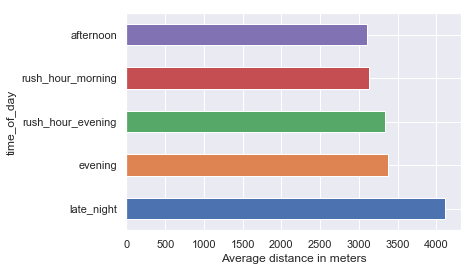

In [26]:
variation = df.groupby(by="time_of_day").mean()["distance"].sort_values(ascending=False)
print(variation)
plt.xlabel("Average distance in meters")
variation.plot(kind="barh")

time_of_day
rush_hour_evening    1024.494552
afternoon             963.922746
rush_hour_morning     918.488716
evening               893.595329
late_night            866.095457
Name: trip_duration, dtype: float64


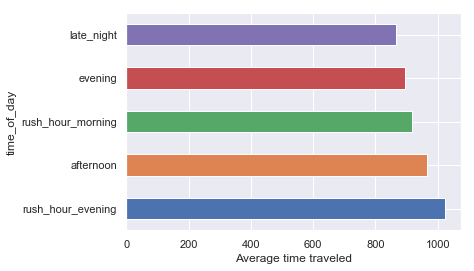

In [27]:
variationt =df.groupby(by="time_of_day").mean()["trip_duration"].sort_values(ascending=False)
print(variationt)
plt.xlabel("Average time traveled")
variationt.plot(kind="barh")

# PART 2

Text(0.5, 1.0, 'Average distance traveled in meters')

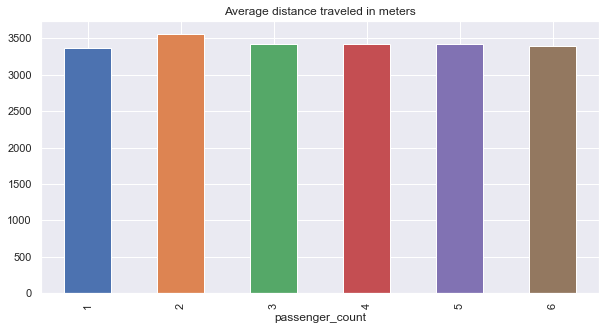

In [28]:
df = df[df["passenger_count"] != 0]
cols = ["distance", "passenger_count"]

fig, ax = plt.subplots(1, 1, figsize=(10,5))
passengers= df.groupby(by="passenger_count")
averagepassenger = passengers["distance"].mean() 

averagepassenger.plot(kind="bar", label="Amount of Passenger")
ax.set_title("Average distance traveled in meters")

In [29]:
df["distance"].corr(df["passenger_count"],method='spearman')

0.016860947711050508

From the correlation value of 0.016 we can see that passenger count has no relation to the distance traveled so I would 
NOT reject the null hypothesis

In [30]:
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day,day_of_week
0,id2875421,2,2016-03-14 17:24:00,3/14/2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1502.172001,rush_hour_evening,0
1,id0012891,2,2016-10-03 21:45:00,3/10/2016 22:05,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5114.806496,evening,0
2,id3361153,1,2016-11-03 07:11:00,3/11/2016 7:20,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1495.017735,rush_hour_morning,3
3,id2129090,1,2016-03-14 14:05:00,3/14/2016 14:28,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1976.279102,afternoon,0
4,id0256505,1,2016-03-14 15:04:00,3/14/2016 15:16,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2513.960397,afternoon,0


Text(0.5, 1.0, 'Average distance traveled in meters')

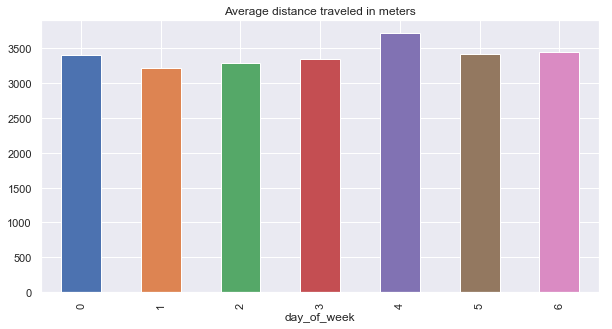

In [31]:
cols = ["distance", "day_of_week"]

fig, ax = plt.subplots(1, 1, figsize=(10,5))
weekdays = df.groupby(by="day_of_week")
averageweek = weekdays["distance"].mean() 

averageweek.plot(kind="bar", label="Days of the Week")
ax.set_title("Average distance traveled in meters")

In [32]:
meanweek = df.groupby(by="day_of_week").mean()["distance"].sort_values(ascending=False)
print(meanweek)

day_of_week
4    3718.008051
6    3444.200335
5    3423.638657
0    3399.103786
3    3341.449123
2    3285.802127
1    3217.269374
Name: distance, dtype: float64


In [33]:
df['Weekday1'] = (df["day_of_week"] <5).astype(float) 

In [34]:
Weekday = df.loc[df['day_of_week'] <5]
Weekday_mean = Weekday['distance'].mean()
print(Weekday_mean)

3369.384568794219


In [35]:
Weekend = df.loc[df['day_of_week'] >4]
Weekend_mean = Weekend['distance'].mean()
print(Weekend_mean)

3436.9968004977814


In [36]:
df["day_of_week"].corr(df["distance"]) #Day of the week has no effect on the distance traveled

0.013421591389382335